# 椭圆曲线的算术

## 椭圆曲线定义

$$ y^2 \equiv x^3 + a x + b \pmod{p} \quad \text{且} \quad 4a^3 + 27b^2 \not\equiv 0 \pmod{p} $$

## 椭圆曲线图形的绘制

### 使用隐函数的方式来绘制曲线

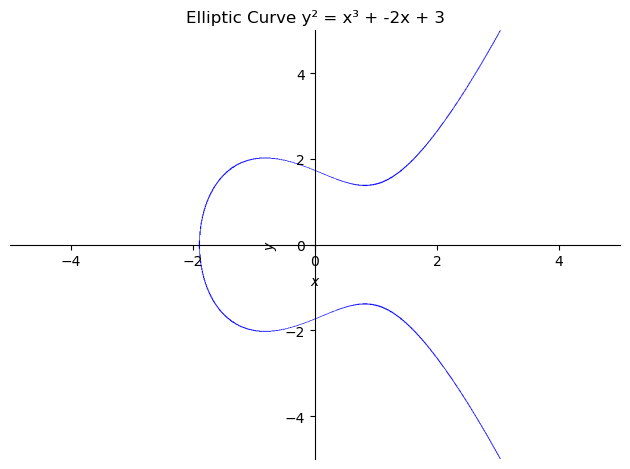

In [74]:
from sympy import symbols, Eq, plot_implicit
import matplotlib.pyplot as plt

x, y = symbols('x y')
a, b = -2, 3
equation = Eq(y**2, x**3 + a*x + b)

# 绘制椭圆曲线
plot_implicit(equation, (x, -5, 5), (y, -5, 5),
              title=f'Elliptic Curve y² = x³ + {a}x + {b}',
              line_color='blue', grid=False)
plt.show()

### 使用等高线的方式绘制

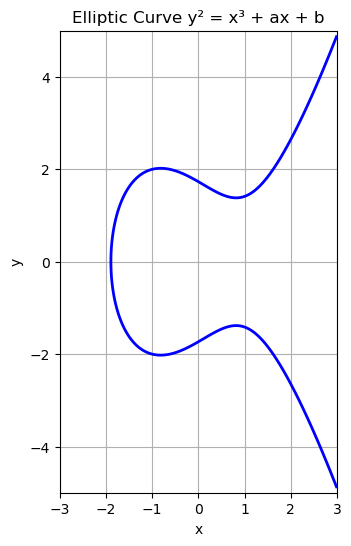

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# 生成网格点
x = np.linspace(-3, 3, 800)
y = np.linspace(-5, 5, 800)
X, Y = np.meshgrid(x, y)

# 定义椭圆曲线参数及方程
a, b = -2, 3
Z = Y**2 - (X**3 + a*X + b)

# 绘制隐函数等高线（Z=0）
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=[0], colors='blue', linewidths=2)
plt.title('Elliptic Curve y² = x³ + ax + b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.gca().set_aspect('equal')  # 保证坐标轴比例一致
plt.show()

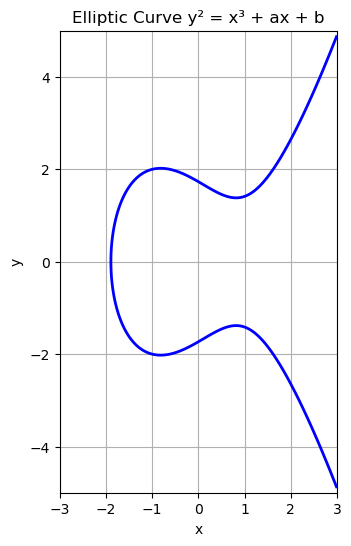

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# 生成网格点
x = np.linspace(-3, 3, 800)
y = np.linspace(-5, 5, 800)
X, Y = np.meshgrid(x, y)

# 定义椭圆曲线参数及方程
a, b = -2, 3
Z = Y**2 - (X**3 + a*X + b)

# 绘制隐函数等高线（Z=0）
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=[0], colors='blue', linewidths=2)
plt.title('Elliptic Curve y² = x³ + ax + b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.gca().set_aspect('equal')  # 保证坐标轴比例一致
plt.show()

### 放到一个图形中对比

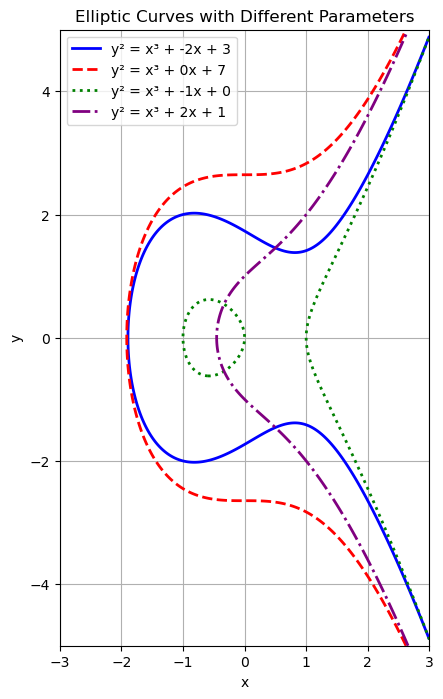

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# 生成网格点
x = np.linspace(-3, 3, 800)
y = np.linspace(-5, 5, 800)
X, Y = np.meshgrid(x, y)

# 定义参数组合
params = [
    (-2, 3),   # 原示例参数
    (0, 7),    # a=0 的对称曲线
    (-1, 0),   # 过原点的曲线
    (2, 1)     # 复杂形态曲线
]

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple']
linestyles = ['-', '--', ':', '-.']
legend_elements = []

for idx, (a, b) in enumerate(params):
    Z = Y**2 - (X**3 + a * X + b)
    contour = plt.contour(X, Y, Z, levels=[0], colors=colors[idx], 
                          linewidths=2, linestyles=linestyles[idx])
    
    # 为每条曲线创建图例代理对象
    proxy = Line2D([0], [0], color=colors[idx], linestyle=linestyles[idx],
                   linewidth=2, label=f'y² = x³ + {a}x + {b}')
    legend_elements.append(proxy)

# 添加图例和标签
plt.title('Elliptic Curves with Different Parameters')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(handles=legend_elements, loc='upper left')
plt.gca().set_aspect('equal')

plt.show()

### 图形的分开对比

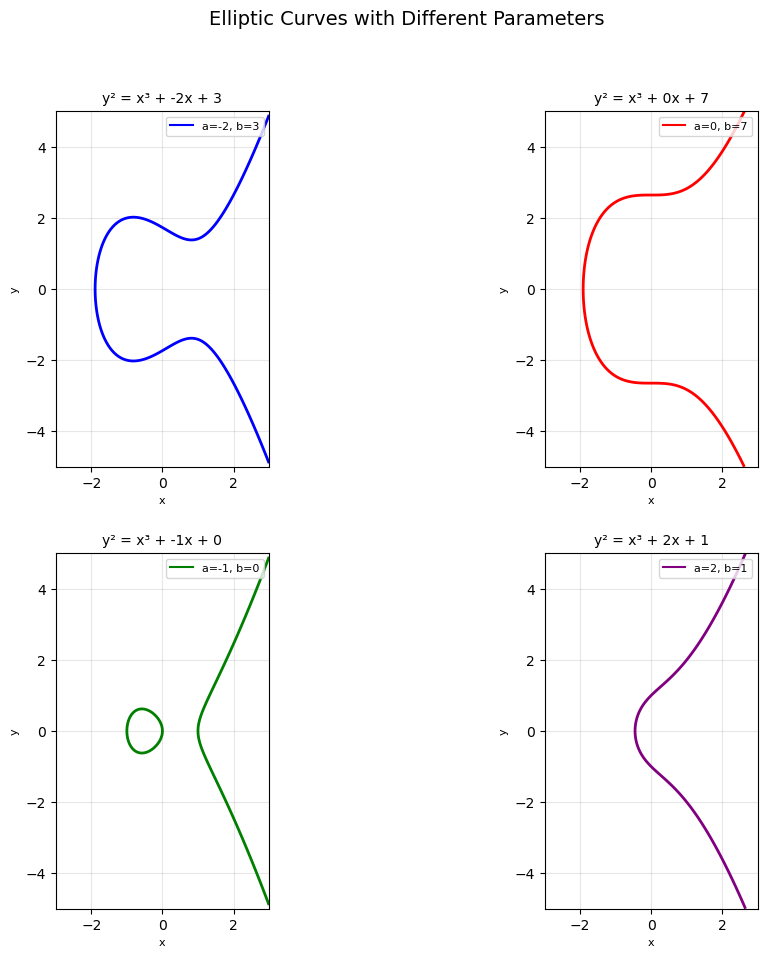

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 生成网格点
x = np.linspace(-3, 3, 800)
y = np.linspace(-5, 5, 800)
X, Y = np.meshgrid(x, y)

# 定义参数组合
params = [
    (-2, 3),   # 原示例参数
    (0, 7),    # a=0 的对称曲线
    (-1, 0),   # 过原点的曲线
    (2, 1)     # 复杂形态曲线
]

# 创建2x2子图布局[4,5](@ref)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 设置整体画布大小
axs = axs.ravel()  # 将二维坐标转换为一维数组方便遍历

# 设置统一样式参数
# line_styles = ['-', '--', ':', '-.']
line_styles = ['-', '-', '-', '-']
colors = ['blue', 'red', 'green', 'purple']

# 遍历参数绘制子图
for idx, (a, b) in enumerate(params):
    # 计算当前曲线的Z值
    Z = Y**2 - (X**3 + a * X + b)
    
    # 绘制当前子图[1,5](@ref)
    ax = axs[idx]
    contour = ax.contour(X, Y, Z, levels=[0], 
                        colors=colors[idx], 
                        linewidths=2, 
                        linestyles=line_styles[idx])
    
    # 设置子图属性[4](@ref)
    ax.set_title(f'y² = x³ + {a}x + {b}', fontsize=10)
    ax.set_xlabel('x', fontsize=8)
    ax.set_ylabel('y', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')  # 保持坐标轴比例一致[1](@ref)
    
    # 添加子图图例（可选）
    ax.plot([], [], color=colors[idx], linestyle=line_styles[idx], 
           label=f'a={a}, b={b}')
    ax.legend(loc='upper right', fontsize=8)

# 设置全局标题[5](@ref)
plt.suptitle('Elliptic Curves with Different Parameters', y=0.98, fontsize=14)

# 调整子图间距[6](@ref)
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)  # 增加子图间距

plt.show()

### 不满足条件的奇异椭圆曲线曲线

$$ 4\color{red}{a^3} + 27\color{blue}{b^2} = 0 $$

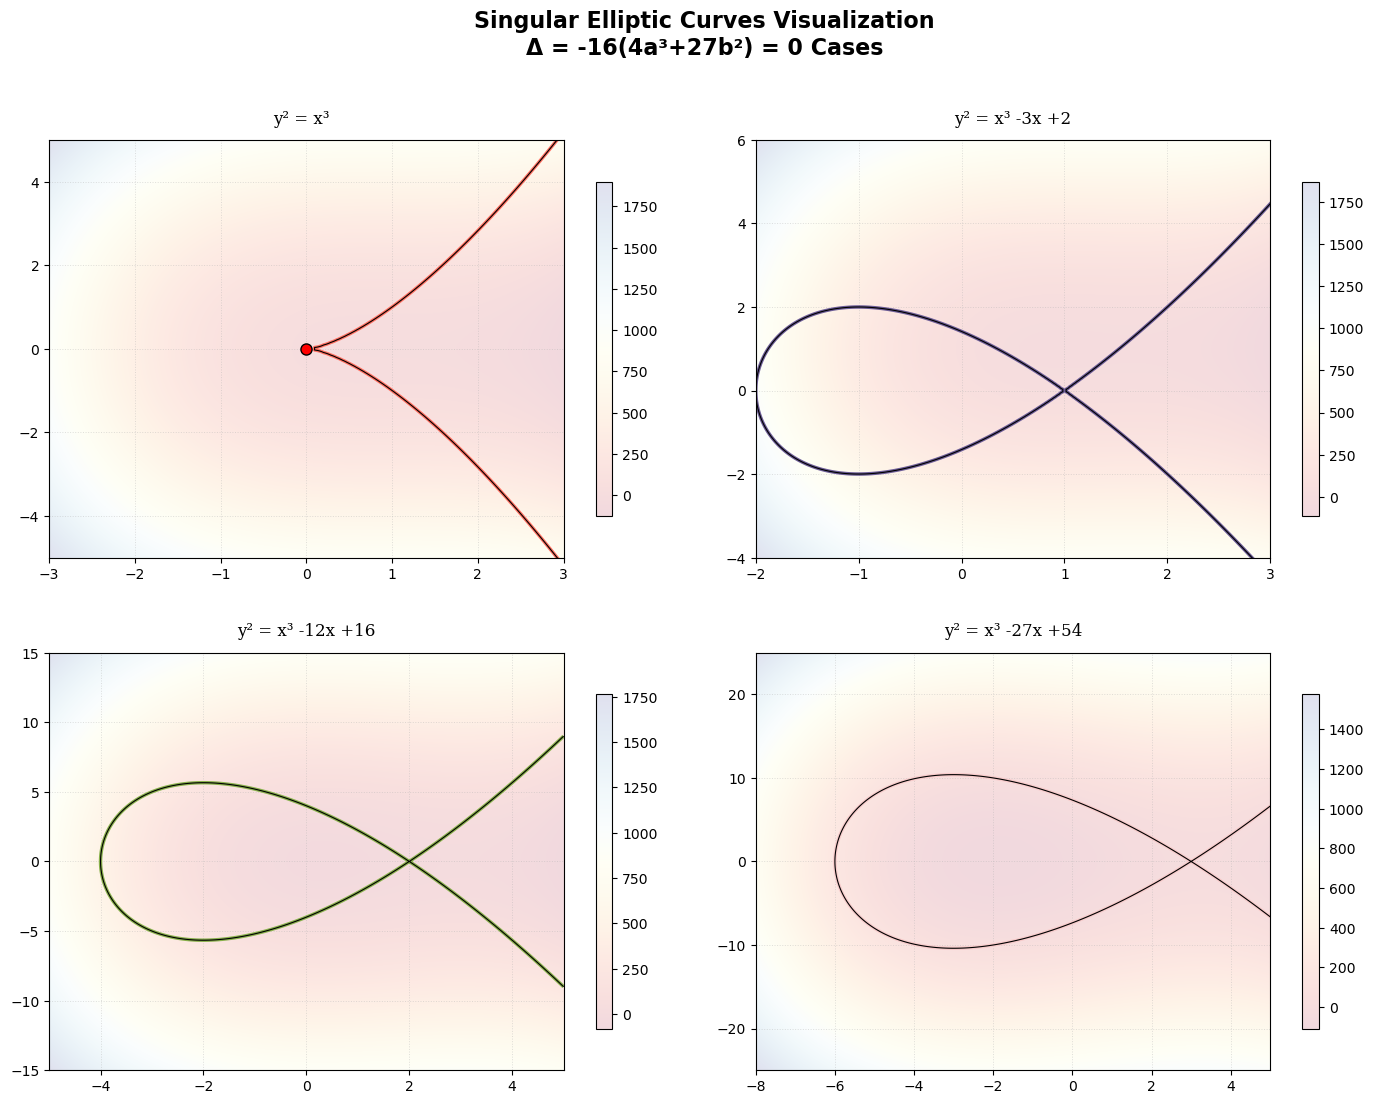

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 生成高密度网格点（应对曲线复杂形态）
x = np.linspace(-10, 5, 1000)  # 扩展x轴范围以适应更大参数
y = np.linspace(-30, 30, 1000)  # 扩展y轴范围
X, Y = np.meshgrid(x, y)

# 特殊参数组合（含奇异曲线）
params = [
    (0, 0),     # 尖点曲线 y² = x³
    (-3, 2),    # 结点曲线 y² = x³ -3x +2
    (-12, 16),  # 复杂奇异曲线
    (-27, 54)   # 最大奇异曲线
]

# 创建带投影的3D子图布局
fig = plt.figure(figsize=(15, 12))
axs = [fig.add_subplot(2, 2, i+1) for i in range(4)]

# 定制颜色映射
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CACA']

# 设置统一绘图参数（修正坐标范围格式）
plot_config = [
    {'xlim': (-3,3), 'ylim': (-5,5)},    # (0,0)
    {'xlim': (-2,3), 'ylim': (-4,6)},     # (-3,2)
    {'xlim': (-5,5), 'ylim': (-15,15)},   # (-12,16)
    {'xlim': (-8,5), 'ylim': (-25,25)}    # (-27,54)
]

for idx, ((a, b), ax, cfg) in enumerate(zip(params, axs, plot_config)):
    # 计算代数曲面
    Z = Y**2 - (X**3 + a*X + b)
    
    # 绘制双等高线（增强视觉效果）
    ax.contour(X, Y, Z, levels=[0], colors=colors[idx], 
              linewidths=2.5, linestyles='-')
    ax.contour(X, Y, Z, levels=[0], colors='black', 
              linewidths=0.8)  # 添加描边效果
    
    # 设置动态坐标轴（修正格式问题）
    ax.set_xlim(cfg['xlim'])
    ax.set_ylim(cfg['ylim'])
    ax.set_title(f'y² = x³ {a:+}x {b:+}'.replace("+0x", "").replace("+0", ""), 
                fontsize=12, pad=12, fontfamily='serif')
    
    # 添加特殊标记
    if a == 0 and b == 0:
        ax.plot(0, 0, 'ro', markersize=8, markeredgecolor='black')  # 标记尖点
    
    # 设置网格样式
    ax.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.4)
    ax.set_axisbelow(True)
    
    # 添加渐变色阶（修正extent参数格式）
    im = ax.imshow(Z, extent=[*cfg['xlim'], *cfg['ylim']],  # 移除多余方括号
                  cmap='RdYlBu', alpha=0.15, origin='lower',
                  aspect='auto')  # 添加aspect参数避免变形
    fig.colorbar(im, ax=ax, shrink=0.8)

# 全局设置
plt.suptitle('Singular Elliptic Curves Visualization\nΔ = -16(4a³+27b²) = 0 Cases', 
             y=0.95, fontsize=16, fontweight='bold')
plt.tight_layout(pad=4, h_pad=3, w_pad=3)
plt.show()

## 找到椭圆曲线上的有效点的方式2

In [224]:
def generate_A(p, a, b):
    """生成集合A：x对应的m值，m = (x³ + a*x + b) mod p"""
    return [(x, (x**3 + a*x + b) % p) for x in range(p)]

def generate_B(p):
    """生成集合B：y对应的n值，n = (y²) mod p"""
    return [(y, (y**2) % p) for y in range(p)]

def find_elliptic_points(p, a, b):
    """匹配集合A和B中m=n的点"""
    A = generate_A(p, a, b)
    B = generate_B(p)
    print(A)
    print(B)
    points = []
    for x, m in A:
        for y, n in B:
            if m == n:
                points.append((x, y))
    return points

if __name__ == "__main__":
    p = 17
    a = 2
    b = 2
    elliptic_points = find_elliptic_points(p, a, b)
    print(f"椭圆曲线 y² = x³ + {a}x + {b} mod {p} 上的所有点：")
    for point in sorted(elliptic_points):
        print(point)

[(0, 2), (1, 5), (2, 14), (3, 1), (4, 6), (5, 1), (6, 9), (7, 2), (8, 3), (9, 1), (10, 2), (11, 12), (12, 3), (13, 15), (14, 3), (15, 7), (16, 16)]
[(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 8), (6, 2), (7, 15), (8, 13), (9, 13), (10, 15), (11, 2), (12, 8), (13, 16), (14, 9), (15, 4), (16, 1)]
椭圆曲线 y² = x³ + 2x + 2 mod 17 上的所有点：
(0, 6)
(0, 11)
(3, 1)
(3, 16)
(5, 1)
(5, 16)
(6, 3)
(6, 14)
(7, 6)
(7, 11)
(9, 1)
(9, 16)
(10, 6)
(10, 11)
(13, 7)
(13, 10)
(16, 4)
(16, 13)


## 找到椭圆曲线上的有效点的方式2

In [414]:
def legendre_symbol(a, p):
    """ 计算Legendre符号 (a|p) """
    ls = pow(a, (p - 1) // 2, p)
    if ls == p - 1:
        return -1
    return ls

def find_point(x, a, b, p):
    """ 寻找椭圆曲线y² = x³ + ax + b在GF(p)上的有效点 """
    rhs = (pow(x, 3, p) + a * x + b) % p
    if rhs == 0:  # y=0是唯一解
        return (x, 0)
    if legendre_symbol(rhs, p) != 1:
        return None
    # 当p ≡3 mod4时，用公式计算平方根[1,5](@ref)
    y = pow(rhs, (p + 1) // 4, p)
    return (x, y) if (y * y) % p == rhs else None

def get_all_points(a, b, p):
    """ 获取椭圆曲线在GF(p)上的所有点（含无穷远点） """
    points = []
    # 遍历所有x坐标[1,3](@ref)
    for x in range(p):
        pt = find_point(x, a, b, p)
        if pt is not None:
            points.append(pt)          # 添加点(x, y)
            if pt[1] != 0:             # 添加对称点(x, p-y)
                points.append((x, p - pt[1]))
    points.append('Infinity')          # 添加无穷远点[3](@ref)
    return points

# 定义有限域GF(263)和椭圆曲线参数[2,3](@ref)
p = 263
a, b = 2, 3

# 方法1：获取所有点（含无穷远点）
all_points = get_all_points(a, b, p)
print("所有点（前5个）：", all_points[:])

# 方法2：验证特定x值
x = 0
point = find_point(x, a, b, p)
print(f"\nx={x}的有效点:", point)

# 验证点是否在曲线上（手动实现）
if point and isinstance(point, tuple):
    rhs = (pow(point[0], 3, p) + a * point[0] + b) % p
    assert (point[1] ** 2) % p == rhs
    print("点验证通过")

所有点（前5个）： [(0, 23), (0, 240), (1, 100), (1, 163), (3, 6), (3, 257), (4, 148), (4, 115), (5, 140), (5, 123), (10, 51), (10, 212), (13, 124), (13, 139), (14, 150), (14, 113), (16, 221), (16, 42), (17, 74), (17, 189), (19, 204), (19, 59), (20, 68), (20, 195), (31, 243), (31, 20), (32, 111), (32, 152), (37, 51), (37, 212), (39, 248), (39, 15), (41, 253), (41, 10), (42, 3), (42, 260), (46, 11), (46, 252), (47, 78), (47, 185), (50, 242), (50, 21), (51, 166), (51, 97), (53, 172), (53, 91), (55, 3), (55, 260), (60, 48), (60, 215), (61, 243), (61, 20), (64, 8), (64, 255), (65, 221), (65, 42), (66, 31), (66, 232), (68, 54), (68, 209), (72, 143), (72, 120), (74, 108), (74, 155), (75, 121), (75, 142), (76, 218), (76, 45), (77, 124), (77, 139), (79, 148), (79, 115), (80, 75), (80, 188), (81, 95), (81, 168), (82, 200), (82, 63), (86, 49), (86, 214), (87, 172), (87, 91), (88, 179), (88, 84), (90, 102), (90, 161), (92, 208), (92, 55), (94, 22), (94, 241), (101, 129), (101, 134), (102, 173), (102, 90),

## 点加法运算规则

$$\lambda = \frac{y_2 - y_1}{x_2 - x_1} \bmod{p}$$

$$x_3 = \left( \lambda^2 - x_1 - x_2 \right) \bmod{p}, \quad y_3 = \left( \lambda(x_1 - x_3) - y_1 \right) \bmod{p}$$

## 实数上椭圆曲线相异点的相加

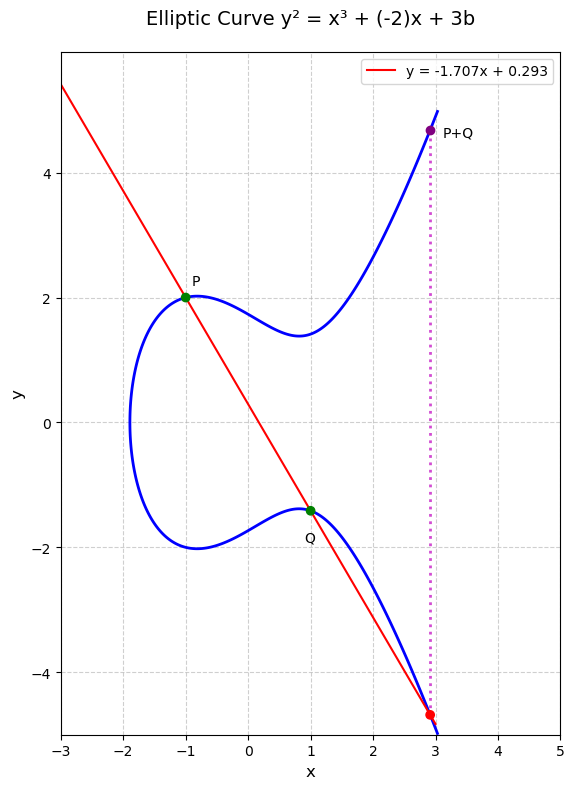

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# 椭圆曲线参数与网格生成
a, b = -2, 3
x = np.linspace(-3, 5, 800)
y = np.linspace(-5, 5, 800)
X, Y = np.meshgrid(x, y)
Z = Y**2 - (X**3 + a*X + b)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=[0], colors='blue', linewidths=2)

# 定义原始点
P = (-1, 2)
Q = (1, -np.sqrt(2))

# 绘制直线
m = (Q[1] - P[1]) / (Q[0] - P[0])
c = P[1] - m * P[0]
x_line = np.linspace(-3, 3, 100)
y_line = m * x_line + c
plt.plot(x_line, y_line, 'r-', label=f'y = {m:.3f}x + {c:.3f}')
# 求解第三个交点
coeff = [1, -m**2, a - 2*m*c, b - c**2]
roots = np.roots(coeff)
real_roots = roots[np.isreal(roots)].real
x3 = real_roots[~np.isin(real_roots, [-1, 1])][0]
y3 = m * x3 + c

# 计算对称点Z
z_point = (x3, -y3)  # 关于x轴对称的点

# 绘制所有点并添加标注
plt.scatter([P[0], Q[0], x3], [P[1], Q[1], y3], 
           color=['green', 'green', 'red'], zorder=5)
plt.scatter(z_point[0], z_point[1], color='purple', zorder=5)

# 添加文本标注（根据网页2、3、4的建议设置标注样式）
#plt.annotate('P', xy=P, xytext=(P[0]-0.3, P[1]+0.5), 
#            arrowprops=dict(arrowstyle='->', color='gray'), fontsize=12)
#plt.annotate('Q', xy=Q, xytext=(Q[0]+0.1, Q[1]-0.7), 
#            arrowprops=dict(arrowstyle='->', color='gray'), fontsize=12)
plt.annotate('P', xy=P, xytext=(P[0]+0.1, P[1]+0.2))
plt.annotate('Q', xy=Q, xytext=(Q[0]-0.1, Q[1]-0.5))
#plt.annotate('T', (x3, y3), xytext=(x3+0.2, y3+0.5), 
#            arrowprops=dict(arrowstyle='->', color='red'), fontsize=12)
#plt.annotate('P+Q', z_point, xytext=(z_point[0]+0.2, z_point[1]-0.5), 
#            arrowprops=dict(arrowstyle='->', color='purple'), fontsize=12)
plt.annotate('P+Q', z_point, xytext=(z_point[0]+0.2, z_point[1]-0.1))
# 绘制T-Z连接线（参考网页5、7的线条样式设置）
#plt.plot([x3, z_point[0]], [y3, z_point[1]], 
#        'm:', linewidth=2, alpha=0.7, label='T-Z Connection')
plt.plot([x3, z_point[0]], [y3, z_point[1]], 
        'm:', linewidth=2, alpha=0.7)
# 图形美化设置（参考网页7的样式建议）
plt.title('Elliptic Curve y² = x³ + (-2)x + 3b', fontsize=14, pad=20)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_aspect('equal')
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

## 实数上椭圆曲线的相同点相加

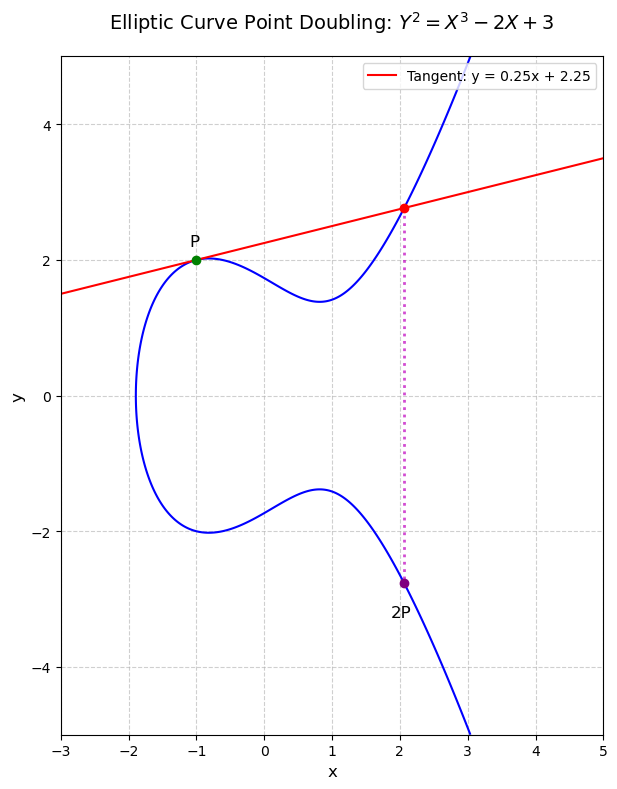

In [194]:
import numpy as np
import matplotlib.pyplot as plt

# 椭圆曲线参数
a, b = -2, 3

# 生成网格数据
x = np.linspace(-3, 5, 1000)
y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x, y)
Z = Y**2 - (X**3 + a*X + b)

# 创建图形
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=[0], colors='blue', linewidths=1.5)

# 定义点P并绘制
P = (-1, 2)
#plt.scatter(P[0], P[1], color='green', zorder=5, label='Point P')
plt.scatter(P[0], P[1], color='green', zorder=5)
#plt.annotate('P', P, xytext=(P[0]+0.1, P[1]+0.5), 
#            arrowprops=dict(arrowstyle='->', color='gray'), fontsize=12)

plt.annotate('P', P, xytext=(P[0]-0.1, P[1]+0.2), fontsize=12)
# 计算切线方程
m_tangent = (3 * P[0]**2 + a) / (2 * P[1])  # 斜率公式
c_tangent = P[1] - m_tangent * P[0]         # 截距

# 绘制切线
x_tangent = np.linspace(-3, 5, 100)
y_tangent = m_tangent * x_tangent + c_tangent
plt.plot(x_tangent, y_tangent, 'r-', label=f'Tangent: y = {m_tangent:.2f}x + {c_tangent:.2f}')

# 求解切线与曲线的交点
coeff = [1, -m_tangent**2, a - 2*m_tangent*c_tangent, b - c_tangent**2]
roots = np.roots(coeff)
real_roots = roots[np.isreal(roots)].real
x3 = real_roots[~np.isclose(real_roots, P[0])][0]  # 排除已知根
y3 = m_tangent * x3 + c_tangent

# 计算对称点Z=2P
z_point = (x3, -y3)

# 绘制交点和对称点
#plt.scatter(x3, y3, color='red', zorder=5, label='Intersection T')
plt.scatter(x3, y3, color='red', zorder=5,)
#plt.scatter(z_point[0], z_point[1], color='purple', zorder=5, label='2P = Z')
plt.scatter(z_point[0], z_point[1], color='purple', zorder=5)
#plt.annotate('T', (x3, y3), xytext=(x3+0.2, y3+0.5), 
#            arrowprops=dict(arrowstyle='->', color='red'), fontsize=12)
#plt.annotate('2P', z_point, xytext=(z_point[0]-0.5, z_point[1]-1), 
#            arrowprops=dict(arrowstyle='->', color='purple'), fontsize=12)
plt.annotate('2P', z_point, xytext=(z_point[0]-0.2, z_point[1]-0.5), fontsize=12)
# 绘制垂直线连接T和Z
#plt.plot([x3, x3], [y3, z_point[1]], 'm:', linewidth=2, alpha=0.7, label='Vertical Line')
plt.plot([x3, x3], [y3, z_point[1]], 'm:', linewidth=2, alpha=0.7)

# 图形美化设置
plt.title('Elliptic Curve Point Doubling: $Y^2 = X^3 - 2X + 3$', fontsize=14, pad=20)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_aspect('equal')
plt.legend(loc='upper right', fontsize=10)
plt.xlim(-3, 5)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

### 椭圆曲线点的相加(倍加)

In [71]:
def mod_inverse(a, p):
    """计算a在模p下的逆元（p为质数）"""
    return pow(a, p-2, p)

class ECPoint:
    def __init__(self, x, y, is_infinity=False):
        self.x = x
        self.y = y
        self.is_infinity = is_infinity  # 标记是否为无穷远点O

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.is_infinity == other.is_infinity

    def __repr__(self):
        return "O" if self.is_infinity else f"({self.x}, {self.y})"

def elliptic_add(p, q, a, mod):
    """椭圆曲线点加法"""
    if p.is_infinity:
        return q
    if q.is_infinity:
        return p
    
    # 处理相反点的情况（P + (-P) = O）
    if p.x == q.x and (p.y != q.y or p.y == 0):
        return ECPoint(0, 0, is_infinity=True)
    
    # 计算斜率λ
    if p != q:
        numerator = (q.y - p.y) % mod
        denominator = (q.x - p.x) % mod
    else:
        numerator = (3 * p.x**2 + a) % mod
        denominator = (2 * p.y) % mod
    
    # 处理分母为0的情况（结果为O）
    if denominator == 0:
        return ECPoint(0, 0, is_infinity=True)
    inv_denominator = mod_inverse(denominator, mod)
    lambd = (numerator * inv_denominator) % mod
    
    # 计算新点坐标
    x_r = (lambd**2 - p.x - q.x) % mod
    y_r = (lambd * (p.x - x_r) - p.y) % mod
    return ECPoint(x_r, y_r)

# 初始化参数
mod = 17
a, b = 2, 2
P = ECPoint(5, 1)

# 计算kP（k=1到18）
current = P
points = [P]
for k in range(2, 19):
    current = elliptic_add(current, P, a, mod)
    points.append(current)
    # 若遇到无穷远点，后续结果均为O
    if current.is_infinity:
        points += [ECPoint(0, 0, is_infinity=True)] * (18 - k)
        break

# 输出结果
for i, point in enumerate(points, 1):
    print(f"{i}P = {point}")

1P = (5, 1)
2P = (6, 3)
3P = (10, 6)
4P = (3, 1)
5P = (9, 16)
6P = (16, 13)
7P = (0, 6)
8P = (13, 7)
9P = (7, 6)
10P = (7, 11)
11P = (13, 10)
12P = (0, 11)
13P = (16, 4)
14P = (9, 1)
15P = (3, 16)
16P = (10, 11)
17P = (6, 14)
18P = (5, 16)


## 画出散点图

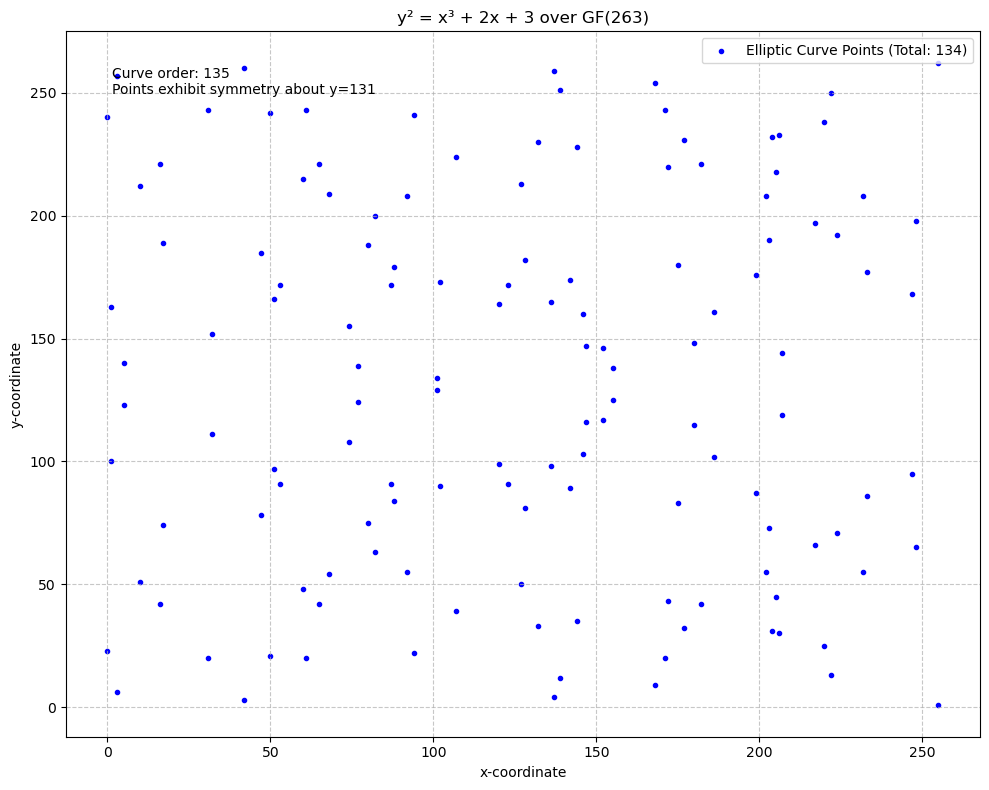

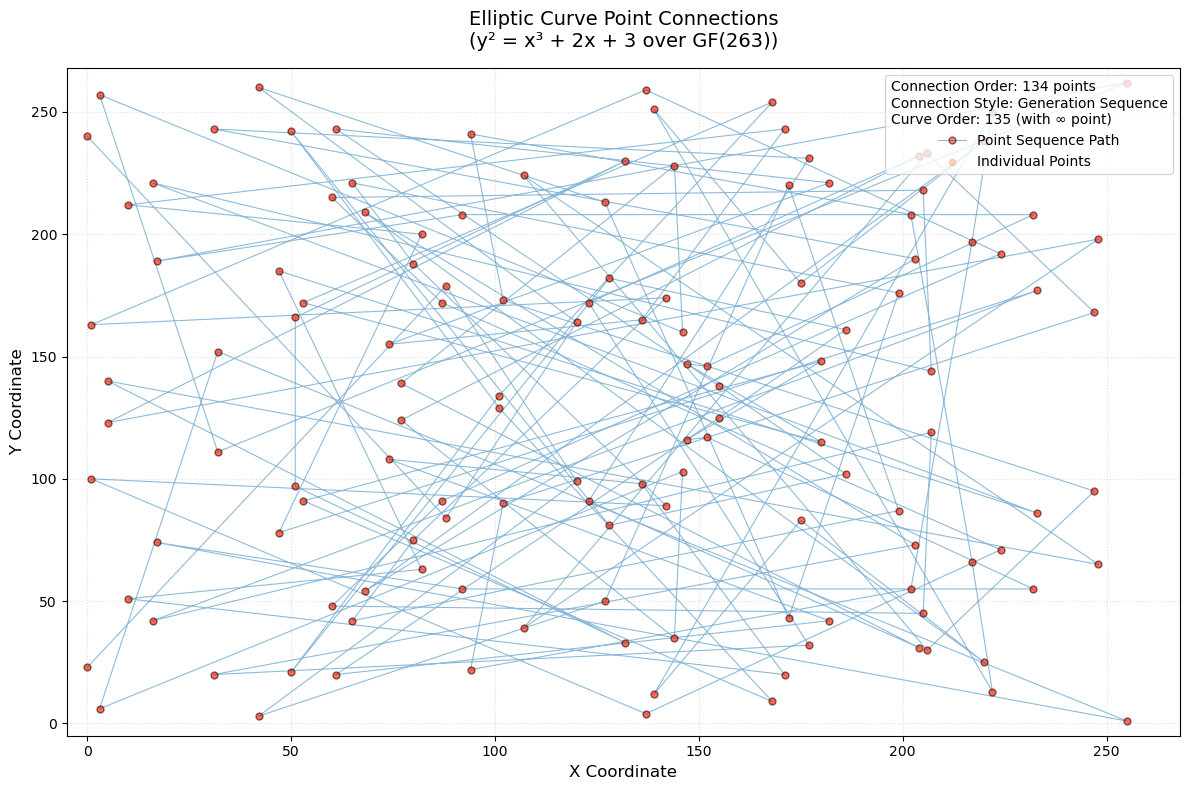

In [368]:
def mod_inverse(a, p):
    """计算 a 在模 p 下的逆元（p 为质数）"""
    return pow(a, p-2, p)

class ECPoint:
    def __init__(self, x, y, is_infinity=False):
        self.x = x
        self.y = y
        self.is_infinity = is_infinity  # 标记是否为无穷远点 O

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.is_infinity == other.is_infinity

    def __repr__(self):
        return "O" if self.is_infinity else f"({self.x}, {self.y})"

def elliptic_add(p, q, a, mod):
    """椭圆曲线点加法"""
    if p.is_infinity:
        return q
    if q.is_infinity:
        return p

    # 处理相反点的情况（P + (-P) = O）
    if p.x == q.x and (p.y != q.y or p.y == 0):
        return ECPoint(0, 0, is_infinity=True)

    # 计算斜率 λ
    if p != q:
        numerator = (q.y - p.y) % mod
        denominator = (q.x - p.x) % mod
    else:
        numerator = (3 * p.x**2 + a) % mod  # 使用椭圆曲线参数 a
        denominator = (2 * p.y) % mod

    # 处理分母为 0 的情况（结果为 O）
    if denominator == 0:
        return ECPoint(0, 0, is_infinity=True)
    inv_denominator = mod_inverse(denominator, mod)
    lambd = (numerator * inv_denominator) % mod

    # 计算新点坐标
    x_r = (lambd**2 - p.x - q.x) % mod
    y_r = (lambd * (p.x - x_r) - p.y) % mod
    return ECPoint(x_r, y_r)

# 初始化参数（对应 Sage 示例 y² = x³ + 2x + 3 over GF(263)）
mod = 263
a, b = 2, 3

# 寻找椭圆曲线上的第一个有效点
P = None
for x in range(mod):
    rhs = (x**3 + a * x + b) % mod
    for y in range(mod):
        if (y**2) % mod == rhs:
            P = ECPoint(x, y)
            break
    if P is not None:
        break

if P is None:
    raise ValueError("未找到椭圆曲线上的有效点")

# 计算 kP（k=1 到最大可能值）
current = P
points = [P]
max_k = 30  # 预设最大迭代次数（根据实际曲线阶数调整）

#for k in range(2, max_k + 1):
for k in range(2, 10000):
    current = elliptic_add(current, P, a, mod)
    points.append(current)
    if current.is_infinity:
        break  # 遇到无穷远点时终止


import matplotlib.pyplot as plt  # 新增的绘图库导入

# 此处保留您原有的全部椭圆曲线计算代码...

# ========== 新增的绘图部分 ==========
# 收集有效点的坐标（过滤无穷远点）
x_coords = [point.x for point in points if not point.is_infinity]
y_coords = [point.y for point in points if not point.is_infinity]

# 设置图形参数
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, color='blue', marker='.', 
            label=f'Elliptic Curve Points (Total: {len(x_coords)})')

# 添加图形标注
plt.title(f"y² = x³ + {a}x + {b} over GF({mod})")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 显示对称特性说明
plt.text(0.05, 0.95, 
         f"Curve order: {len(points)}\nPoints exhibit symmetry about y={mod//2}",
         transform=plt.gca().transAxes,
         verticalalignment='top')

plt.tight_layout()
plt.show()

# 原有椭圆曲线计算代码保持不变...
# [...] 此处插入用户提供的椭圆曲线点生成代码 [...]

# =================== 可视化部分 =================== 
# 提取有效点坐标（过滤无穷远点）
valid_points = [p for p in points if not p.is_infinity]
x_coords = [p.x for p in valid_points]
y_coords = [p.y for p in valid_points]

# 创建画布
plt.figure(figsize=(12, 8), dpi=100)

# 无序折线图绘制（反映点生成顺序）
plt.plot(x_coords, y_coords, 
         marker='o',           # 保留点标记
         markersize=5,         # 控制标记尺寸
         markerfacecolor='red',
         markeredgecolor='black',
         linestyle='-',        # 实线连接
         linewidth=0.8, 
         alpha=0.5,           # 半透明效果
         color='#1f77b4',       # 标准蓝色
         label='Point Sequence Path')

# 添加散点层增强可视化（可选）
plt.scatter(x_coords, y_coords, 
            s=20, 
            c='#ff7f0e',       # 对比色
            alpha=0.3, 
            label='Individual Points')

# 图形标注设置
plt.title(f"Elliptic Curve Point Connections\n(y² = x³ + {a}x + {b} over GF({mod}))", 
         fontsize=14, pad=15)
plt.xlabel("X Coordinate", fontsize=12)
plt.ylabel("Y Coordinate", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)

# 添加图例和统计信息
legend_text = f"""Connection Order: {len(valid_points)} points
Connection Style: Generation Sequence
Curve Order: {len(points)} (with ∞ point)"""
plt.legend(title=legend_text, loc='upper right', framealpha=0.8)

# 坐标轴范围设置
plt.xlim(-5, mod+5)
plt.ylim(-5, mod+5)

plt.tight_layout()
plt.show()
# 输出结果
#for i, point in enumerate(points, 1):
#    print(f"{i}P = {point}")

# 使用一个更大的数字

sagemath：https://www.johannes-bauer.com/compsci/ecc/ 
素数列表： https://en.wikipedia.org/wiki/List_of_prime_numbers

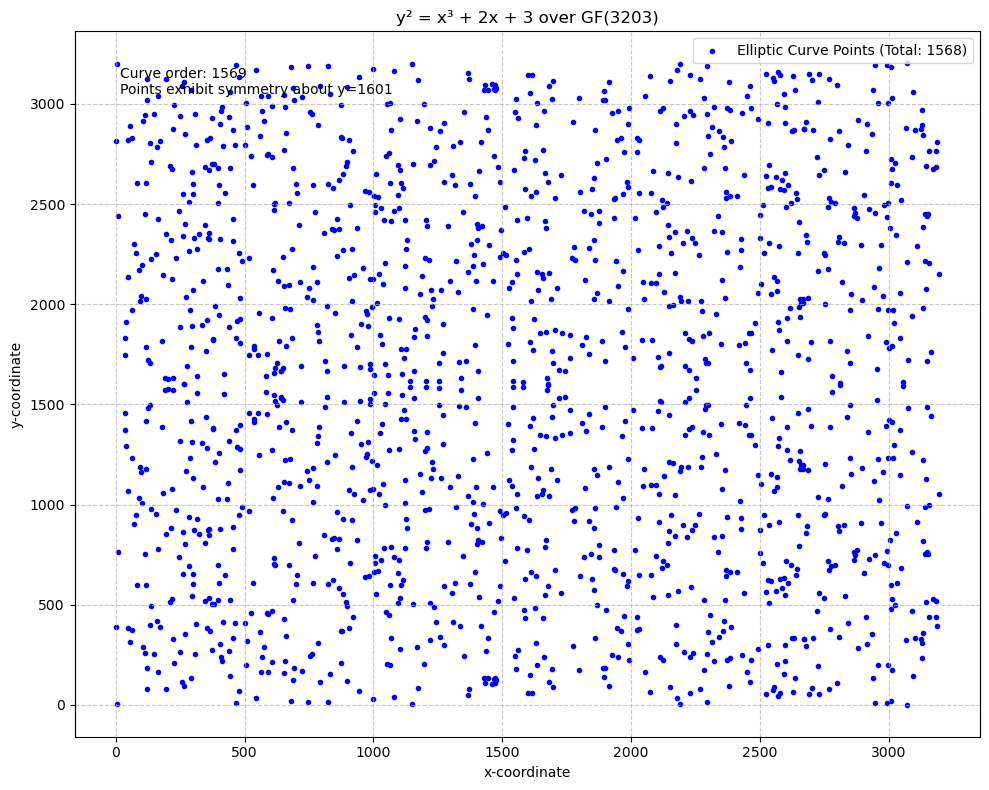

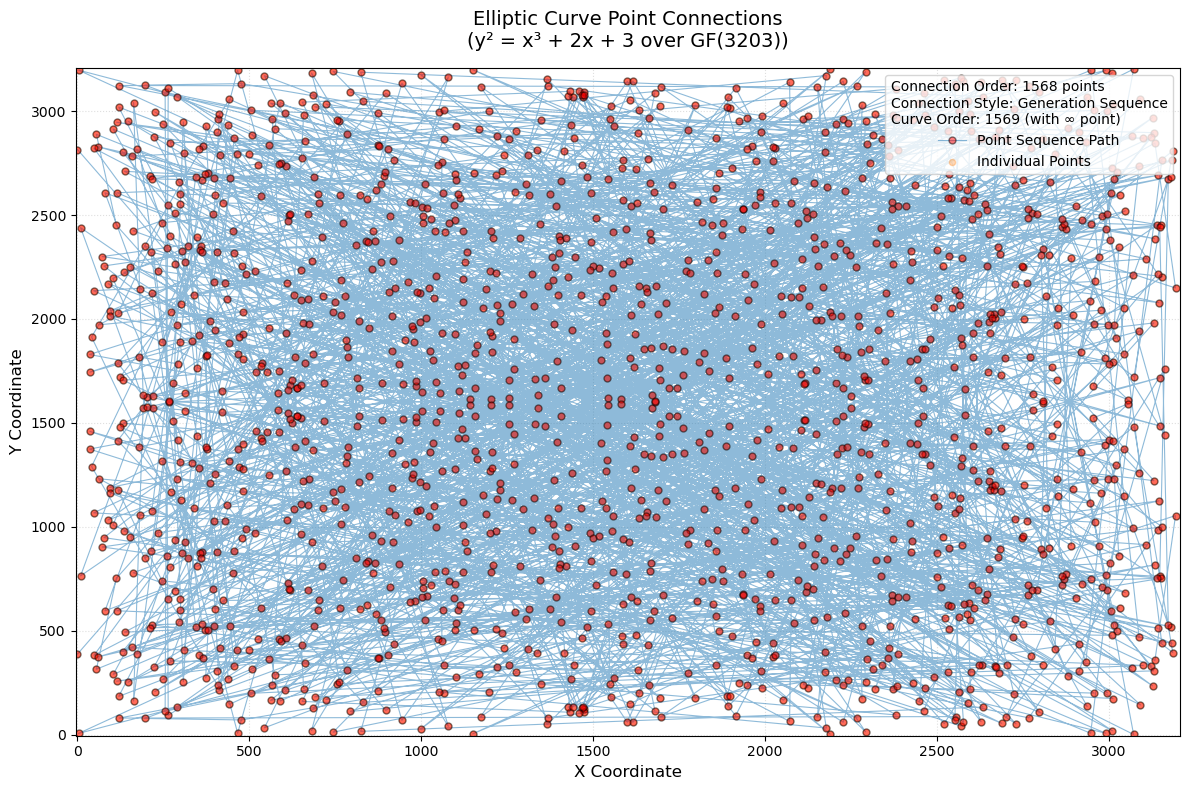

In [313]:
def mod_inverse(a, p):
    """计算 a 在模 p 下的逆元（p 为质数）"""
    return pow(a, p-2, p)

class ECPoint:
    def __init__(self, x, y, is_infinity=False):
        self.x = x
        self.y = y
        self.is_infinity = is_infinity  # 标记是否为无穷远点 O

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.is_infinity == other.is_infinity

    def __repr__(self):
        return "O" if self.is_infinity else f"({self.x}, {self.y})"

def elliptic_add(p, q, a, mod):
    """椭圆曲线点加法"""
    if p.is_infinity:
        return q
    if q.is_infinity:
        return p

    # 处理相反点的情况（P + (-P) = O）
    if p.x == q.x and (p.y != q.y or p.y == 0):
        return ECPoint(0, 0, is_infinity=True)

    # 计算斜率 λ
    if p != q:
        numerator = (q.y - p.y) % mod
        denominator = (q.x - p.x) % mod
    else:
        numerator = (3 * p.x**2 + a) % mod  # 使用椭圆曲线参数 a
        denominator = (2 * p.y) % mod

    # 处理分母为 0 的情况（结果为 O）
    if denominator == 0:
        return ECPoint(0, 0, is_infinity=True)
    inv_denominator = mod_inverse(denominator, mod)
    lambd = (numerator * inv_denominator) % mod

    # 计算新点坐标
    x_r = (lambd**2 - p.x - q.x) % mod
    y_r = (lambd * (p.x - x_r) - p.y) % mod
    return ECPoint(x_r, y_r)

# 初始化参数（对应 Sage 示例 y² = x³ + 2x + 3 over GF(263)）
mod = 3203
a, b = 2, 3

# 寻找椭圆曲线上的第一个有效点
P = None
for x in range(mod):
    rhs = (x**3 + a * x + b) % mod
    for y in range(mod):
        if (y**2) % mod == rhs:
            P = ECPoint(x, y)
            break
    if P is not None:
        break

if P is None:
    raise ValueError("未找到椭圆曲线上的有效点")

# 计算 kP（k=1 到最大可能值）
current = P
points = [P]
max_k = 30  # 预设最大迭代次数（根据实际曲线阶数调整）

#for k in range(2, max_k + 1):
for k in range(2, 10000):
    current = elliptic_add(current, P, a, mod)
    points.append(current)
    if current.is_infinity:
        break  # 遇到无穷远点时终止


import matplotlib.pyplot as plt  # 新增的绘图库导入

# 此处保留您原有的全部椭圆曲线计算代码...

# ========== 新增的绘图部分 ==========
# 收集有效点的坐标（过滤无穷远点）
x_coords = [point.x for point in points if not point.is_infinity]
y_coords = [point.y for point in points if not point.is_infinity]

# 设置图形参数
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, color='blue', marker='.', 
            label=f'Elliptic Curve Points (Total: {len(x_coords)})')

# 添加图形标注
plt.title(f"y² = x³ + {a}x + {b} over GF({mod})")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 显示对称特性说明
plt.text(0.05, 0.95, 
         f"Curve order: {len(points)}\nPoints exhibit symmetry about y={mod//2}",
         transform=plt.gca().transAxes,
         verticalalignment='top')

plt.tight_layout()
plt.show()

# 原有椭圆曲线计算代码保持不变...
# [...] 此处插入用户提供的椭圆曲线点生成代码 [...]

# =================== 可视化部分 =================== 
# 提取有效点坐标（过滤无穷远点）
valid_points = [p for p in points if not p.is_infinity]
x_coords = [p.x for p in valid_points]
y_coords = [p.y for p in valid_points]

# 创建画布
plt.figure(figsize=(12, 8), dpi=100)

# 无序折线图绘制（反映点生成顺序）
plt.plot(x_coords, y_coords, 
         marker='o',           # 保留点标记
         markersize=5,         # 控制标记尺寸
         markerfacecolor='red',
         markeredgecolor='black',
         linestyle='-',        # 实线连接
         linewidth=0.8, 
         alpha=0.5,           # 半透明效果
         color='#1f77b4',       # 标准蓝色
         label='Point Sequence Path')

# 添加散点层增强可视化（可选）
plt.scatter(x_coords, y_coords, 
            s=20, 
            c='#ff7f0e',       # 对比色
            alpha=0.3, 
            label='Individual Points')

# 图形标注设置
plt.title(f"Elliptic Curve Point Connections\n(y² = x³ + {a}x + {b} over GF({mod}))", 
         fontsize=14, pad=15)
plt.xlabel("X Coordinate", fontsize=12)
plt.ylabel("Y Coordinate", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)

# 添加图例和统计信息
legend_text = f"""Connection Order: {len(valid_points)} points
Connection Style: Generation Sequence
Curve Order: {len(points)} (with ∞ point)"""
plt.legend(title=legend_text, loc='upper right', framealpha=0.8)

# 坐标轴范围设置
plt.xlim(-5, mod+5)
plt.ylim(-5, mod+5)

plt.tight_layout()
plt.show()
# 输出结果
#for i, point in enumerate(points, 1):
#    print(f"{i}P = {point}")

## double and add  -- 简单

In [418]:
#!/usr/bin/env python
# -*- coding:UTF-8

# 这个算法不错 是欧几里得扩展算法
def extended_gcd(aa, bb):
    lastremainder, remainder = abs(aa), abs(bb)
    x, lastx, y, lasty = 0, 1, 1, 0
    while remainder:
        lastremainder, (quotient, remainder) = remainder, divmod(lastremainder, remainder)
        x, lastx = lastx - quotient*x, x
        y, lasty = lasty - quotient*y, y
    return lastremainder, lastx * (-1 if aa < 0 else 1), lasty * (-1 if bb < 0 else 1)

def modinv(a, m):
    g, x, y = extended_gcd(a, m)
    if g != 1:
        raise ValueError
    return x % m

# https://stackoverflow.com/questions/37377982/remove-the-0b-in-binary
# https://pythonspot.com/binary-numbers-and-logical-operators/
# https://stackoverflow.com/questions/1476/how-do-you-express-binary-literals-in-python
# https://en.wikipedia.org/wiki/Elliptic_curve_point_multiplication
#print(str(1)+"p:\t", (x1,y1))
# 必须得用算法才可以 不能这么蛮力
#  Q ← 0
#   for j ← i − 1 downto 0 do
#       Q ← point_double(Q)
#       if (dj != 0)
#           Q ← point_add(Q, djG)
#   return Q
# https://stackoverflow.com/questions/37377982/remove-the-0b-in-binary                                                                                    21:42:09 [19/1912]
# https://pythonspot.com/binary-numbers-and-logical-operators/
# https://stackoverflow.com/questions/1476/how-do-you-express-binary-literals-in-python
# https://en.wikipedia.org/wiki/Elliptic_curve_point_multiplication
#print(str(1)+"p:\t", (x1,y1))
# 必须得用算法才可以 不能这么蛮力
#  Q ← 0
#   for j ← i − 1 downto 0 do
#       Q ← point_double(Q)
#       if (dj != 0)
#           Q ← point_add(Q, djG)
#   return Q

# 然后用 算法实现
#i=0
def ecc_double(x1,y1):
    s=((3*(x1**2)+a)*modinv(2*y1,p))%p
    x3=(s**2-x1-x1)%p
    y3=(s*(x1-x3)-y1)%p
    return (x3,y3)
#print ecc_double(x1,y1)


def ecc_add(x1,y1,x2,y2):
    s = 0
    if (x1==x2):
        s=((3*(x1**2)+a)*modinv(2*y1,p))%p
    else:
        s=((y2-y1)*modinv(x2-x1,p))%p
    x3=(s**2-x1-x2)%p
    y3=(s*(x1-x3)-y1)%p
    return (x3,y3)

def ecc_cal(x1,y1,priv):
    (x3,y3)=(0,0)
    (x_tmp,y_tmp)=(x1,y1)
    init=0  #初始化设置
    for b in str(bin(priv)[2:]):
        #print b
        if (b=='1') and (init==0):
           init=1
        elif (b=='1') and (init==1):
           (x3,y3)=ecc_double(x_tmp,y_tmp)
           (x3,y3)=ecc_add(x1,y1,x3,y3)
           (x_tmp, y_tmp) = (x3,y3)
        else:
           (x3,y3)=ecc_double(x_tmp,y_tmp)
           (x_tmp, y_tmp) = (x3,y3)
    return (x3, y3)

if __name__ == '__main__':
    # 这是参数 Prime:
    p=263
    a=2
    b=3
    # 这个是生成元
    x1=0
    y1=23
    for priv in range(2,5):
        (x3, y3)=ecc_cal(x1, y1, priv)
        #print("result---:",(hex(x3),hex(y3)))
        print("result---:",((x3),(y3)))

result---: (88, 179)
result---: (120, 99)
result---: (42, 3)


## double and add  -- 复杂


In [422]:
#!/usr/bin/env python
# -*- coding:UTF-8

# 这个算法不错 是欧几里得扩展算法
def extended_gcd(aa, bb):
    lastremainder, remainder = abs(aa), abs(bb)
    x, lastx, y, lasty = 0, 1, 1, 0
    while remainder:
        lastremainder, (quotient, remainder) = remainder, divmod(lastremainder, remainder)
        x, lastx = lastx - quotient*x, x
        y, lasty = lasty - quotient*y, y
    return lastremainder, lastx * (-1 if aa < 0 else 1), lasty * (-1 if bb < 0 else 1)

def modinv(a, m):
    g, x, y = extended_gcd(a, m)
    if g != 1:
        raise ValueError
    return x % m

# https://stackoverflow.com/questions/37377982/remove-the-0b-in-binary
# https://pythonspot.com/binary-numbers-and-logical-operators/
# https://stackoverflow.com/questions/1476/how-do-you-express-binary-literals-in-python
# https://en.wikipedia.org/wiki/Elliptic_curve_point_multiplication
#print(str(1)+"p:\t", (x1,y1))
# 必须得用算法才可以 不能这么蛮力
#  Q ← 0
#   for j ← i − 1 downto 0 do
#       Q ← point_double(Q)
#       if (dj != 0)
#           Q ← point_add(Q, djG)
#   return Q
# https://stackoverflow.com/questions/37377982/remove-the-0b-in-binary                                                                                    21:42:09 [19/1912]
# https://pythonspot.com/binary-numbers-and-logical-operators/
# https://stackoverflow.com/questions/1476/how-do-you-express-binary-literals-in-python
# https://en.wikipedia.org/wiki/Elliptic_curve_point_multiplication
#print(str(1)+"p:\t", (x1,y1))
# 必须得用算法才可以 不能这么蛮力
#  Q ← 0
#   for j ← i − 1 downto 0 do
#       Q ← point_double(Q)
#       if (dj != 0)
#           Q ← point_add(Q, djG)
#   return Q

# 然后用 算法实现
#i=0
def ecc_double(x1,y1):
    s=((3*(x1**2)+a)*modinv(2*y1,p))%p
    x3=(s**2-x1-x1)%p
    y3=(s*(x1-x3)-y1)%p
    return (x3,y3)
#print ecc_double(x1,y1)


def ecc_add(x1,y1,x2,y2):
    s = 0
    if (x1==x2):
        s=((3*(x1**2)+a)*modinv(2*y1,p))%p
    else:
        s=((y2-y1)*modinv(x2-x1,p))%p
    x3=(s**2-x1-x2)%p
    y3=(s*(x1-x3)-y1)%p
    return (x3,y3)

def ecc_cal(x1,y1,priv):
    (x3,y3)=(0,0)
    (x_tmp,y_tmp)=(x1,y1)
    init=0  #初始化设置
    for b in str(bin(priv)[2:]):
        #print b
        if (b=='1') and (init==0):
           init=1
        elif (b=='1') and (init==1):
           (x3,y3)=ecc_double(x_tmp,y_tmp)
           (x3,y3)=ecc_add(x1,y1,x3,y3)
           (x_tmp, y_tmp) = (x3,y3)
        else:
           (x3,y3)=ecc_double(x_tmp,y_tmp)
           (x_tmp, y_tmp) = (x3,y3)
    return (x3, y3)

if __name__ == '__main__':
    # 这是参数 Prime:
    p=0x00ffffffff00000001000000000000000000000000fffffffffffffffffffffff
    a=0x00ffffffff00000001000000000000000000000000fffffffffffffffffffffffc
    b=0x5ac635d8aa3a93e7b3ebbd55769886bc651d06b0cc53b0f63bce3c3e27d2604b
    # 这个是生成元
    x1=0x79BE667EF9DCBBAC55A06295CE870B07029BFCDB2DCE28D959F2815B16F81798
    y1=0x483ADA7726A3C4655DA4FBFC0E1108A8FD17B448A68554199C47D08FFB10D4B8
    for priv in range(2,5):
        (x3, y3)=ecc_cal(x1, y1, priv)
        print("result---:",(hex(x3),hex(y3)))
        #print("result---:",((x3),(y3)))

result---: ('0x77dd0e41ba0e3cf77f0e0799e1f5018b0965bfbe74204bf36aaae335bb31cd5', '0xcd3fbf357f4f9bbc0196879d7ec6b67db45fa6a22eb8ab29af56ca23f6dc46c')
result---: ('0xd1923c9fcc4a00adc39c867a97f2659e1c0a090a64a187c5c31311eff6da331', '0xb487ece28c79bb5a775e6ffda6f7d7c2cc6cfb1fd1e2cb0034039fec5bb3f83')
result---: ('0x3a04bf48d08a62f1974aa4c087780c9794dd56a72ac42c80b9379eb3725343d', '0xbed7a12d76d4af67a2fdc82595d5c94f20e23208c1980726c0ef92b80ac008f')


## bitcoin书籍里面的一个实例

In [406]:
import ecdsa                                                                                                                               
import os

# secp256k1参数
_p = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F
_r = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141
_b = 0x0000000000000000000000000000000000000000000000000000000000000007
_a = 0x0000000000000000000000000000000000000000000000000000000000000000
_Gx = 0x79BE667EF9DCBBAC55A06295CE870B07029BFCDB2DCE28D959F2815B16F81798
_Gy = 0x483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8

# 创建曲线和生成器
curve_secp256k1 = ecdsa.ellipticcurve.CurveFp(_p, _a, _b)
generator_secp256k1 = ecdsa.ellipticcurve.Point(curve_secp256k1, _Gx, _Gy, _r)
oid_secp256k1 = (1, 3, 132, 0, 10)
SECP256k1 = ecdsa.curves.Curve("SECP256k1", curve_secp256k1, generator_secp256k1, oid_secp256k1)
ec_order = _r
curve = curve_secp256k1
generator = generator_secp256k1

def random_secret():
    # 生成32字节随机数据并转换为整数
    byte_array = os.urandom(32)
    return int.from_bytes(byte_array, byteorder='big')  # 修复点：使用int.from_bytes

def get_point_pubkey(point):
    # 生成压缩格式公钥
    prefix = b'\x03' if (point.y() % 2) == 1 else b'\x02'
    return prefix + point.x().to_bytes(32, byteorder='big')

def get_point_pubkey_uncompressed(point):
    # 生成非压缩格式公钥
    prefix = b'\x04'
    x_bytes = point.x().to_bytes(32, byteorder='big')
    y_bytes = point.y().to_bytes(32, byteorder='big')
    return prefix + x_bytes + y_bytes
# 生成私钥
secret = random_secret()
print("Secret:", secret)

# 计算公钥点
point = secret * generator
print("EC point:", point)
print("BTC compressed public key:", get_point_pubkey(point).hex())

# 验证点对象创建
point1 = ecdsa.ellipticcurve.Point(curve, point.x(), point.y(), ec_order)
assert point1 == point

Secret: 32546738696818330058764131773457597654467822652773326789767392025150306926112
EC point: (108173122761441229437955562790259853234451015633587979034051222431080497894397,67425378198608253219290518810587556588077611541166918599802373610942251300186)
BTC compressed public key: 02ef27d15adba80e7e42099153a286a64ed79b775632a1fdcf0b94ee5a794153fd


In [412]:
import ecdsa                                                                                                                               
import os

# secp256k1参数
_p = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F
_r = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141
_b = 0x0000000000000000000000000000000000000000000000000000000000000007
_a = 0x0000000000000000000000000000000000000000000000000000000000000000
_Gx = 0x79BE667EF9DCBBAC55A06295CE870B07029BFCDB2DCE28D959F2815B16F81798
_Gy = 0x483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8

# 创建曲线和生成器
curve_secp256k1 = ecdsa.ellipticcurve.CurveFp(_p, _a, _b)
generator_secp256k1 = ecdsa.ellipticcurve.Point(curve_secp256k1, _Gx, _Gy, _r)
oid_secp256k1 = (1, 3, 132, 0, 10)
SECP256k1 = ecdsa.curves.Curve("SECP256k1", curve_secp256k1, generator_secp256k1, oid_secp256k1)
ec_order = _r
curve = curve_secp256k1
generator = generator_secp256k1

def random_secret():
    # 生成32字节随机数据并转换为整数
    byte_array = os.urandom(32)
    return int.from_bytes(byte_array, byteorder='big')  # 修复点：使用int.from_bytes

def get_point_pubkey(point):
    # 生成压缩格式公钥
    prefix = b'\x03' if (point.y() % 2) == 1 else b'\x02'
    return prefix + point.x().to_bytes(32, byteorder='big')

def get_point_pubkey_uncompressed(point):
    # 生成非压缩格式公钥
    prefix = b'\x04'
    x_bytes = point.x().to_bytes(32, byteorder='big')
    y_bytes = point.y().to_bytes(32, byteorder='big')
    return prefix + x_bytes + y_bytes
# 生成私钥
#secret = random_secret()
secret = 24997449092432235356517042330696284802266979552182541177028771830290978002689
print("Secret:", secret)

# 计算公钥点
point = secret * generator
print("EC point:", point)
print("BTC compressed public key:", get_point_pubkey(point).hex())

# 验证点对象创建
point1 = ecdsa.ellipticcurve.Point(curve, point.x(), point.y(), ec_order)
assert point1 == point

g_x=19392617020122398850551482326416956411969774509248206653668413128752447807165
g_y=90267644068685280776004372984774992147593158721677859647442094522566471207195
assert point.x() == g_x
assert point.y() == g_y

Secret: 24997449092432235356517042330696284802266979552182541177028771830290978002689
EC point: (19392617020122398850551482326416956411969774509248206653668413128752447807165,90267644068685280776004372984774992147593158721677859647442094522566471207195)
BTC compressed public key: 032adfd50f4a2591940f318b7237aa73a7daa2ae909ce35151c33c89308d36debd
